In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score
from sklearn.model_selection import train_test_split

train = pd.read_csv('./Data/예측 data/titanic.train.csv')
test = pd.read_csv('./Data/예측 data/titanic.test.csv')
train.shape , test.shape

((891, 12), (418, 11))

In [269]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [270]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [271]:
def embarked_age_new(row):
    embarked = row['Embarked']
    age = row['Age']
    
    if embarked =='C' and age<30:
        return '30_c'
    else:
        return 'etc'
    
train['embaked_age_new'] = train.apply(embarked_age_new,axis=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embaked_age_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,etc
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,etc
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,etc
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,etc
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,etc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,etc
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,etc
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,etc
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,30_c


In [267]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [69]:
category_col  = train.select_dtypes(include='object').columns
num_col  = train.select_dtypes(exclude='object').columns
category_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [76]:
train.isnull().sum() # cabin 결측값 너무 많아서 지운다 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
train['Age'].fillna(train['Age'].mean(),inplace=True)
test['Age'].fillna(train['Age'].mean(),inplace=True)

In [4]:
train.dropna(subset='Embarked',inplace=True)
test.dropna(subset='Embarked',inplace=True)

In [85]:
train.drop(columns=['Cabin','Name','PassengerId','Ticket'],inplace=True)
test.drop(columns=['Cabin','Name','PassengerId','Ticket'],inplace=True)

In [89]:
train.select_dtypes(include='object').columns

Index(['Sex', 'Embarked'], dtype='object')

## 범주형 변수 확인

In [14]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

ValueError: Could not interpret value `Sex` for `x`. An entry with this name does not appear in `data`.

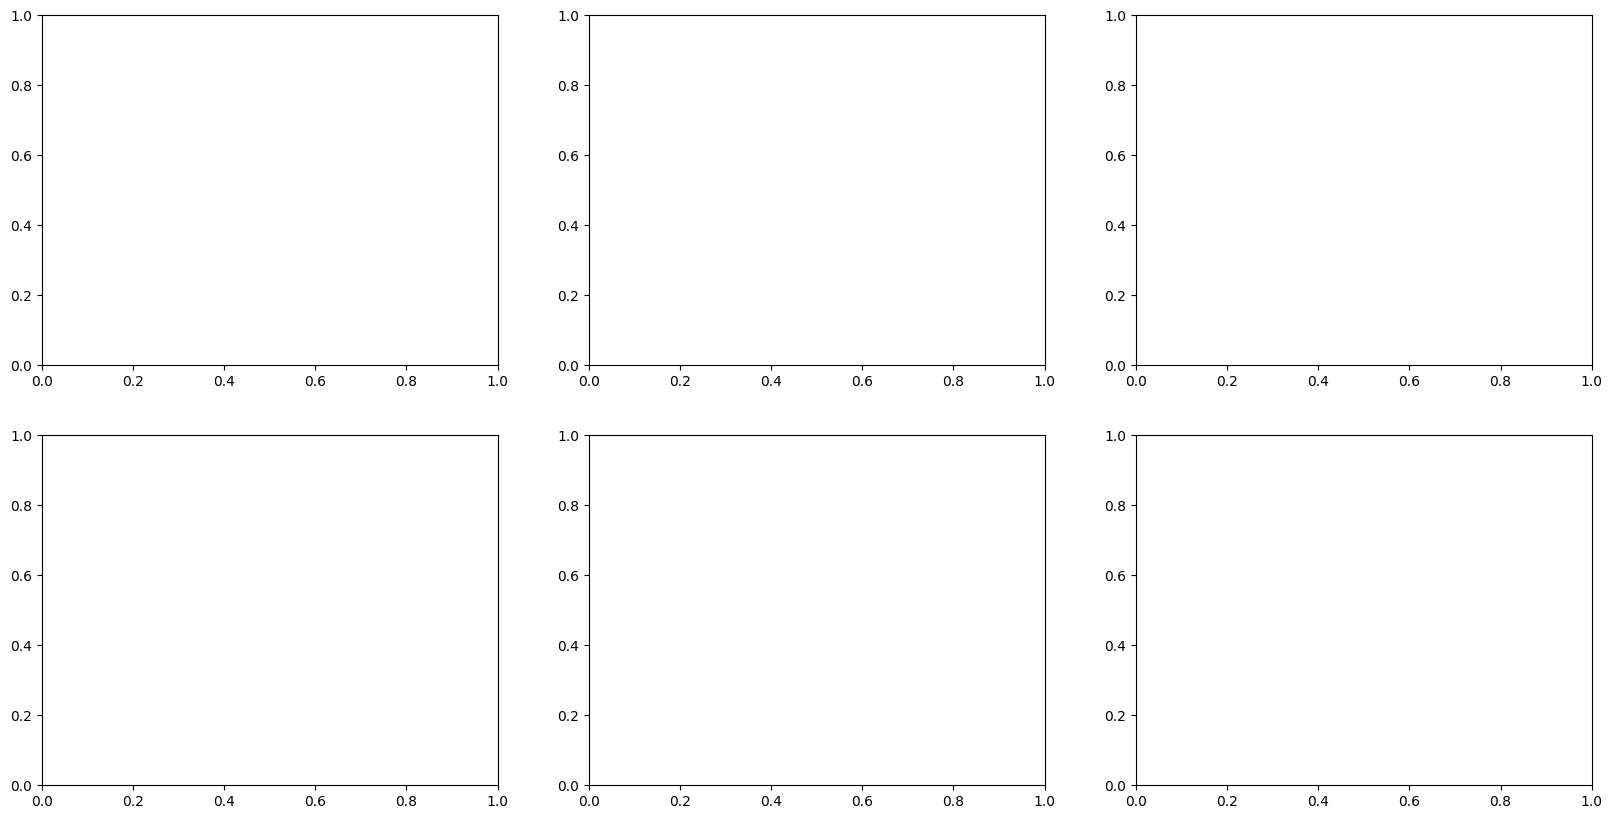

In [117]:
fig , axes = plt.subplots(2,3,figsize=[20,10])

sns.countplot(x='Sex',data=train,ax=axes[0,0])
sns.barplot(x='Sex',y='Survived',data=train,ax=axes[0,1])
sns.countplot(x='Pclass',data=train,ax=axes[0,2])
sns.barplot(x='Pclass',y='Survived',data=train,ax=axes[0,3])
sns.countplot(x='Embarked',data=train,ax=axes[1,0])
sns.barplot(x='Embarked',y='Survived',data=train,ax=axes[1,1])
sns.countplot(x='Parch',data=train,ax=axes[1,2])
sns.barplot(x='Parch',y='Survived',data=train,ax=axes[1,3])


In [14]:
train.columns = map(lambda x : x.lower(),train.columns)
train

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [91]:
def embakred_new(Embarked):
    if Embarked in ['C','Q']:
        return 'CQ'
    else:
        return 'S'
train['new_Embarked'] =  train['Embarked'].apply(embakred_new)
test['new_Embarked'] =  test['Embarked'].apply(embakred_new)

In [92]:
def pclass_new(Pclass):
    if Pclass in [1,2]:
        return 'low_pclass'
    else:
        return 'high_pclass'
    
train['pclass_new'] =  train['Pclass'].apply(pclass_new)
test['pclass_new'] =  test['Pclass'].apply(pclass_new)

<Axes: xlabel='pclass_new', ylabel='Survived'>

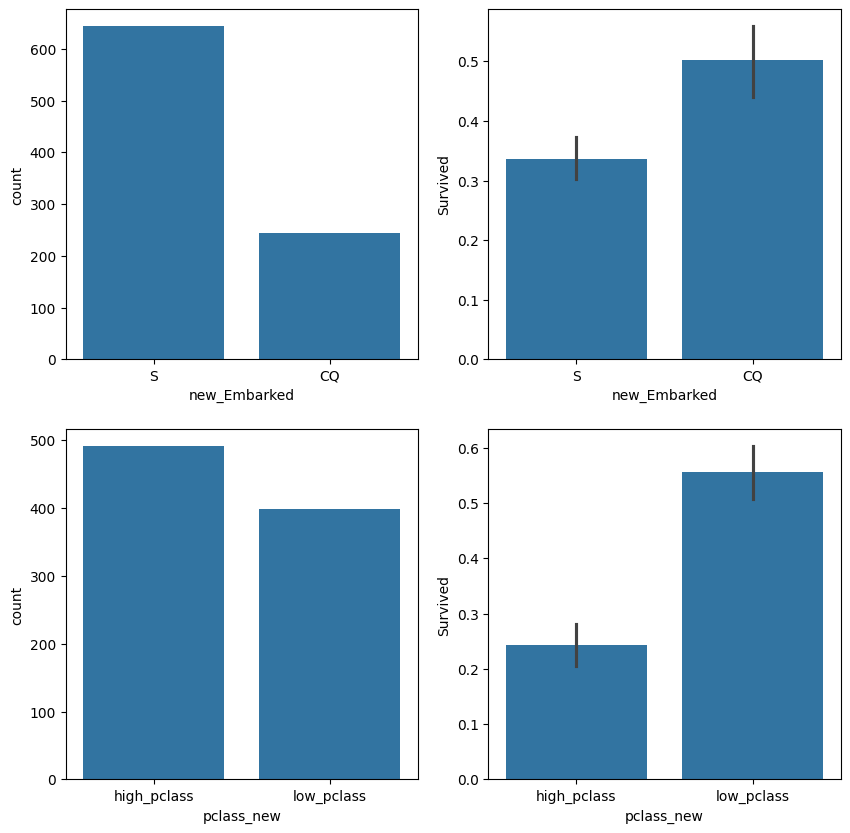

In [93]:
fig , axes = plt.subplots(2,2,figsize=[10,10])
sns.countplot(x='new_Embarked',data=train,ax=axes[0,0])
sns.barplot(x='new_Embarked',y='Survived',data=train,ax=axes[0,1])
sns.countplot(x='pclass_new',data=train,ax=axes[1,0])
sns.barplot(x='pclass_new',y='Survived',data=train,ax=axes[1,1])

<Axes: xlabel='Fare'>

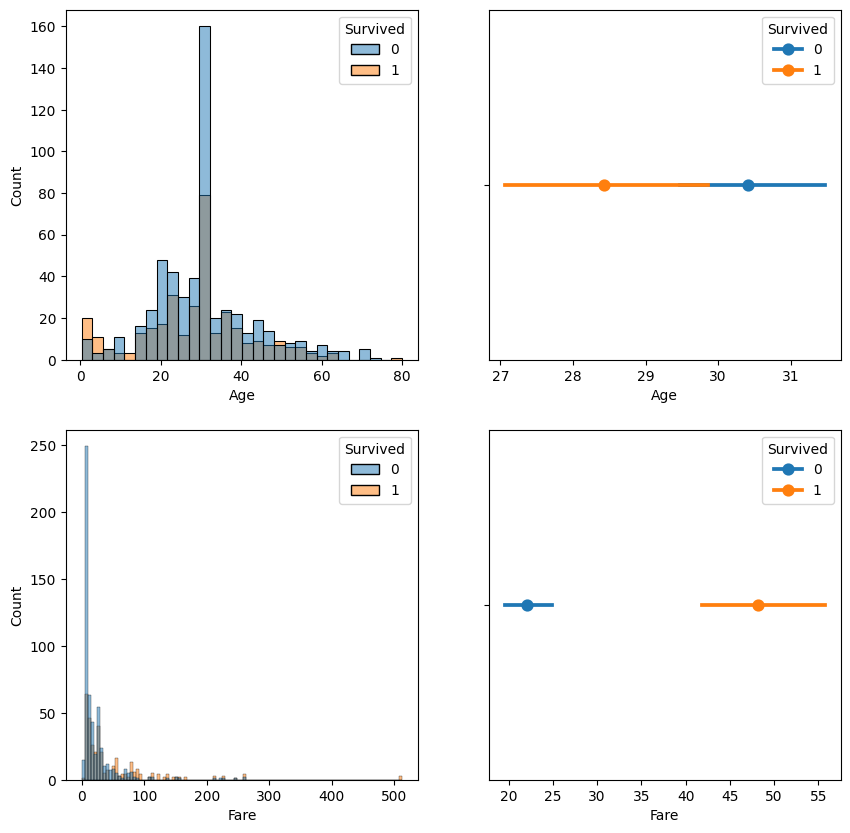

In [94]:
fig , axes = plt.subplots(2,2,figsize=[10,10])
sns.histplot(x='Age',hue='Survived',data=train,ax=axes[0,0])
sns.pointplot(x='Age',hue='Survived',data=train,ax=axes[0,1])
sns.histplot(x='Fare',hue='Survived',data=train,ax=axes[1,0])
sns.pointplot(x='Fare',hue='Survived',data=train,ax=axes[1,1])

In [97]:
category_col = train.select_dtypes(include='object').columns
category_col

Index(['Sex', 'Embarked', 'new_Embarked', 'pclass_new'], dtype='object')

In [98]:
train = pd.get_dummies(train,columns=category_col,prefix=category_col)
test = pd.get_dummies(test,columns=category_col,prefix=category_col)

In [99]:
train.replace([True,False],[1,0],inplace=True)
test.replace([True,False],[1,0],inplace=True)

<Axes: xlabel='Fare', ylabel='Count'>

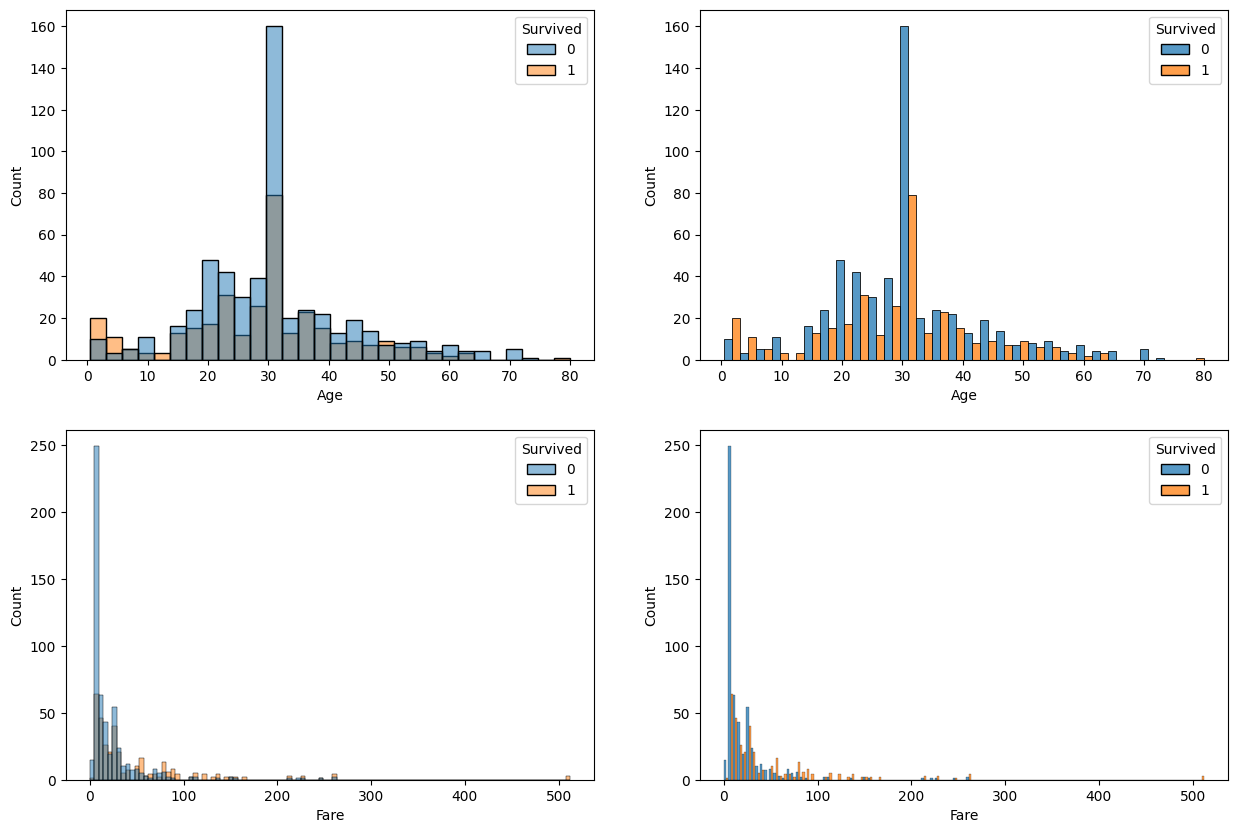

In [130]:
fig , axes = plt.subplots(2,2,figsize=[15,10])
sns.histplot(x='Age',hue='Survived',data=train,ax=axes[0,0])
sns.histplot(x='Age',hue='Survived',data=train,multiple="dodge",ax=axes[0,1])
sns.histplot(x='Fare',hue='Survived',data=train,ax=axes[1,0])
sns.histplot(x='Fare',hue='Survived',data=train,multiple="dodge",ax=axes[1,1])

In [132]:
train['Fare'] = train['Fare'].apply(lambda x : np.log(x) if x>0 else 0)
test['Fare'] = test['Fare'].apply(lambda x : np.log(x) if x>0 else 0)

<Axes: xlabel='Fare', ylabel='Count'>

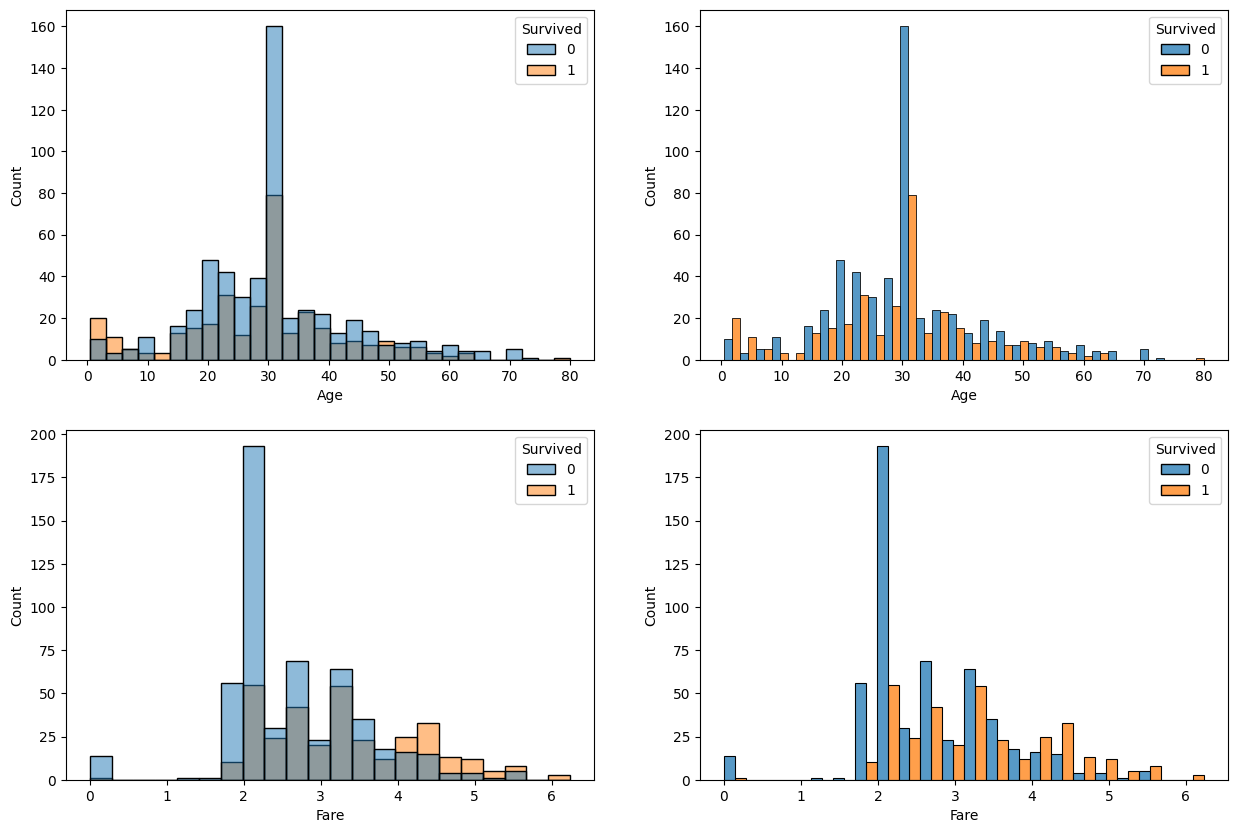

In [133]:
fig , axes = plt.subplots(2,2,figsize=[15,10])
sns.histplot(x='Age',hue='Survived',data=train,ax=axes[0,0])
sns.histplot(x='Age',hue='Survived',data=train,multiple="dodge",ax=axes[0,1])
sns.histplot(x='Fare',hue='Survived',data=train,ax=axes[1,0])
sns.histplot(x='Fare',hue='Survived',data=train,multiple="dodge",ax=axes[1,1])

<Axes: xlabel='Age', ylabel='Count'>

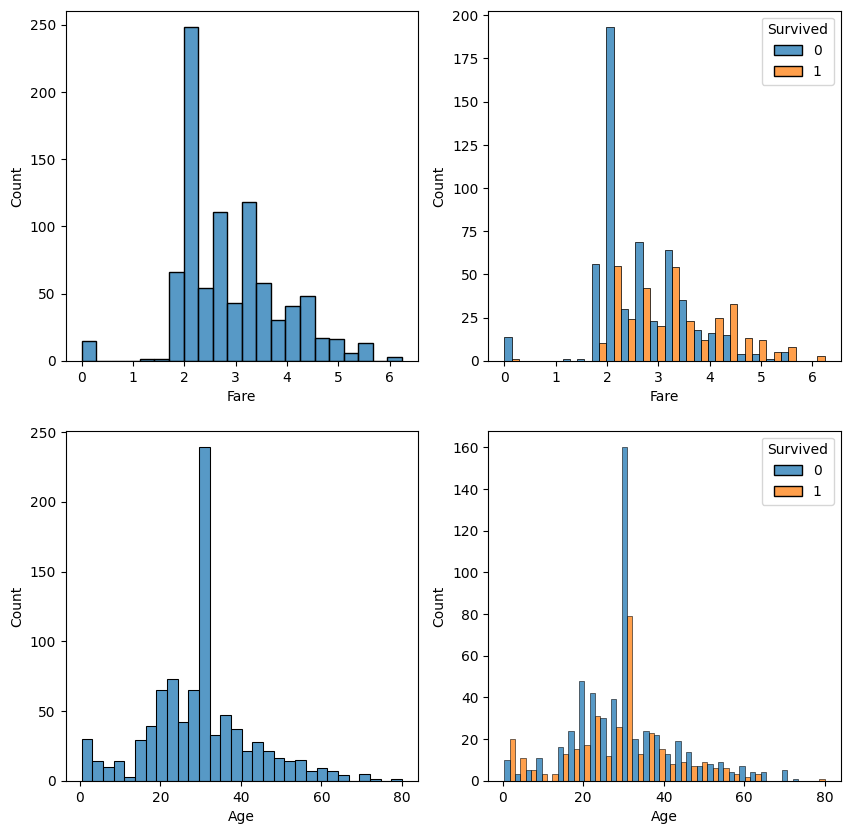

In [143]:
fig , axes = plt.subplots(2,2,figsize=[10,10])
sns.histplot(x='Fare',data=train,ax=axes[0,0])
sns.histplot(x='Fare',hue='Survived',multiple='dodge',data=train,ax=axes[0,1])
sns.histplot(x='Age',data=train,ax=axes[1,0])
sns.histplot(x='Age',hue='Survived',multiple='dodge',data=train,ax=axes[1,1])

In [145]:
def new_age(age):
    if age <= 10:
        return '어린이'
    else:
        return '유아아님'

train['Age'] = train['Age'].apply(new_age)
test['Age'] = test['Age'].apply(new_age)

<Axes: xlabel='Age', ylabel='Count'>

c:\Users\User\document\etc study\studyvenv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  func(*args, **kwargs)
c:\Users\User\document\etc study\studyvenv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  func(*args, **kwargs)
c:\Users\User\document\etc study\studyvenv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45784 (\N{HANGUL SYLLABLE NIM}) missing from current font.
  func(*args, **kwargs)
c:\Users\User\document\etc study\studyvenv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  func(*args, **kwargs)
c:\Users\User\document\etc study\studyvenv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47536 (\N{HANGUL SYLLABLE RIN}) missing from current font.
  func(*args, **kwargs)
c:\Users\User\document\etc study\studyvenv\lib\site-pa

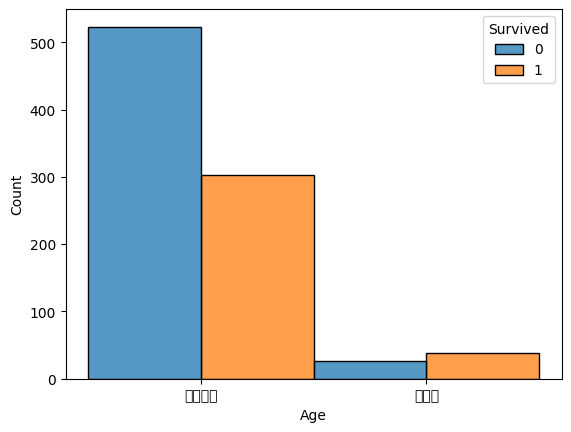

In [ ]:
sns.histplot(x='Age',hue='Survived',multiple='dodge',data=train)

In [173]:
# train = pd.get_dummies(train,columns=['Age'])
# test = pd.get_dummies(test,columns=['Age'])
train.replace([True,False],[1,0],inplace=True)
test.replace([True,False],[1,0],inplace=True)

In [169]:
train.shape , test.shape

((889, 16), (418, 15))

In [175]:
test.columns

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'new_Embarked_CQ',
       'new_Embarked_S', 'pclass_new_high_pclass', 'pclass_new_low_pclass',
       'Age_어린이', 'Age_유아아님'],
      dtype='object')

In [152]:
train_copy = train.copy()
test_copy = train.copy()

In [214]:
col = ['Sex_male', 'Fare', 'Pclass', 'SibSp', 'Age_어린이', 'Parch', 'Embarked_S',
       'Age_유아아님', 'Embarked_C', 'new_Embarked_CQ', 'pclass_new_low_pclass',
       'Sex_female', 'Embarked_Q', 'new_Embarked_S', 'pclass_new_high_pclass']
col

['Sex_male',
 'Fare',
 'Pclass',
 'SibSp',
 'Age_어린이',
 'Parch',
 'Embarked_S',
 'Age_유아아님',
 'Embarked_C',
 'new_Embarked_CQ',
 'pclass_new_low_pclass',
 'Sex_female',
 'Embarked_Q',
 'new_Embarked_S',
 'pclass_new_high_pclass']

## 분할

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score,precision_score,confusion_matrix, f1_score , accuracy_score , roc_curve , auc

X = train[col].values
Y = train['Survived'].values
X_train , X_val , Y_train , Y_val = train_test_split(X,Y,test_size=0.3,random_state=256)
X_train.shape , X_val.shape , Y_train.shape , Y_val.shape

((622, 15), (267, 15), (622,), (267,))

## 평가

In [272]:
model_GB = GradientBoostingClassifier(max_depth=15)
model_GB.fit(X_train,Y_train)
pred_train = model_GB.predict(X_train)
pred_test = model_GB.predict(X_val)

print(accuracy_score(Y_train,pred_train) , accuracy_score(Y_val,pred_test))
print(f1_score(Y_train,pred_train) , f1_score(Y_val,pred_test))
print(precision_score(Y_train,pred_train) , precision_score(Y_val,pred_test))
print(recall_score(Y_train,pred_train) , recall_score(Y_val,pred_test))

confusion_matrix(Y_val,pred_test)


0.9308681672025724 0.8127340823970037
0.9042316258351893 0.7311827956989247
0.9575471698113207 0.8192771084337349
0.8565400843881856 0.6601941747572816


array([[149,  15],
       [ 35,  68]], dtype=int64)

In [250]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,Y_train)
pred_train = model_DT.predict(X_train)
pred_test = model_DT.predict(X_val)

print(accuracy_score(Y_train,pred_train) , accuracy_score(Y_val,pred_test))
print(f1_score(Y_train,pred_train) , f1_score(Y_val,pred_test))
print(precision_score(Y_train,pred_train) , precision_score(Y_val,pred_test))
print(recall_score(Y_train,pred_train) , recall_score(Y_val,pred_test))

confusion_matrix(Y_val,pred_test)

0.9308681672025724 0.8089887640449438
0.9042316258351893 0.7272727272727274
0.9575471698113207 0.8095238095238095
0.8565400843881856 0.6601941747572816


array([[148,  16],
       [ 35,  68]], dtype=int64)

In [258]:
fpr , trp , treshhold = roc_curve(Y_train,pred_train)
auc_tr = auc(fpr,trp)
auc_tr

0.9165817305057811

In [219]:
Series_importance = pd.Series(model_GB.feature_importances_,index=test.columns)
Series_importance.sort_values(ascending=False)

pclass_new_high_pclass    0.359340
SibSp                     0.343782
Age_유아아님                  0.094293
Fare                      0.070100
Sex_female                0.036892
Parch                     0.034611
Sex_male                  0.020410
Embarked_C                0.017300
Embarked_Q                0.013045
Embarked_S                0.004542
Age_어린이                   0.003116
new_Embarked_S            0.001427
new_Embarked_CQ           0.001141
Pclass                    0.000000
pclass_new_low_pclass     0.000000
dtype: float64

In [245]:
submission = pd.DataFrame(model_GB.predict(test)).reset_index().rename({0:'Survived'},axis=1)
submission

c:\Users\User\document\etc study\studyvenv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


,index,Survived
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
413,413,0
414,414,0
415,415,1
416,416,0
